In this application we will read a netCDF file containing a surface drifter trajectory. 

# 1. Reading the data

We use the netCDF4 module.

In [48]:
%matplotlib inline
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import colors

The file path should be adapted to the computer you are working with.

In [49]:
drifterfile = "/data_local/DataOceano/MyOcean/INSITU_GLO_NRT_OBSERVATIONS_013_030/monthly/201507/GL_201507_TS_DB_46563.nc"

We load the coordinates (longitude, latitude and depth), and the temperature if it exists. To this end, we use the [*try...except*](https://docs.python.org/2/tutorial/errors.html) statement. If the temperature variable were not present in the file, we would get a [KeyError](https://wiki.python.org/moin/KeyError). 

In [50]:
with netCDF4.Dataset(drifterfile) as nc:
    lon = nc.variables['LONGITUDE'][:]
    lat = nc.variables['LATITUDE'][:]
    depth = nc.variables['DEPH'][:]
    
    try: 
        temperature = nc.variables['TEMP'][:, 0]
        print 'Variable temperature is in the file'
    except KeyError:
        print 'No variable temperature in this file'

Variable temperature is in the file


With this file we see that indeed, temperature is available.

# 2. Basic plotting

## 2.1 First try

Just to visualize what the data look like, we plot the successive positions.

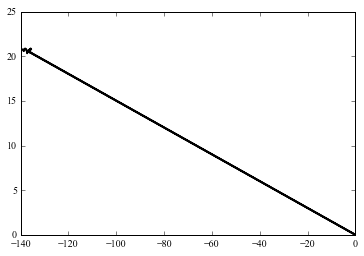

In [51]:
fig = plt.figure()
plt.plot(lon, lat)
plt.show()

With this file it seems that there is a problem with some of the data points. However we considered all the positions, whatever their quality. Now we will only take the good data points, with **QF = 1**. To do so, we read the variable relative to the quality of the position.

In [52]:
with netCDF4.Dataset(drifterfile) as nc:
    POSITION_QC = nc.variables['POSITION_QC'][:]

We can count the number of positions that are considered as good.

In [53]:
ngoodpoints = np.sum(POSITION_QC == 1)
print str(ngoodpoints) + ' data points have a good position'

697 data points have a good position


Now we have several possibilities to take the QF into account:
* Remove the bad data.
* Mask the data considered as bad.

# 2.2 Removing bad data

The idea is to generate new arrays storing the coordinates, only with the values that are considered as good.

In [54]:
lon_clean = lon[POSITION_QC == 1]
lat_clean = lat[POSITION_QC == 1]

Let's check the plot:

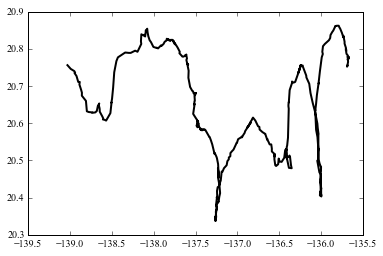

In [55]:
fig = plt.figure()
plt.plot(lon_clean, lat_clean)
plt.show()

That seems ok. **Note:** with this method, the new arrays have a different size:

In [56]:
print lon.shape
print lon_clean.shape

(709,)
(697,)


## 2.3 Masking data

Within **numpy**, there is a specific module to deal with [masked array](http://docs.scipy.org/doc/numpy/reference/maskedarray.html). It offers many possibilities to mask an array, for instance mask an array where greater than a given value [masked_greater](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.masked_greater.html#numpy.ma.masked_greater). Here we will use [masked_where](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.masked_where.html#numpy.ma.masked_where), which masks an array where a condition is met. The condition will be stated as **POSITION_QC != 1**, i.e., values not equal to 1.

In [57]:
lon_masked = np.ma.masked_where(POSITION_QC != 1, lon)
lat_masked = np.ma.masked_where(POSITION_QC != 1, lat)

After that we retry the same plot:

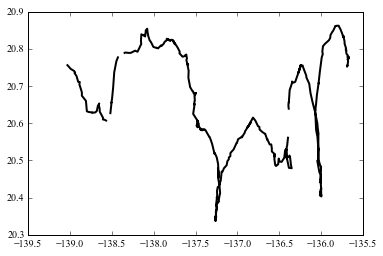

In [58]:
fig = plt.figure()
plt.plot(lon_masked, lat_masked)
plt.show()

and yes, now it looks correct. Note that with the *mask* technique, the arrays have the same size as before:

In [59]:
print lon.shape
print lon_masked.shape

(709,)
(709,)


# 3. Plotting the data values

As we have the coordinates and the temperature, it is easy to produce a *scatter plot*.

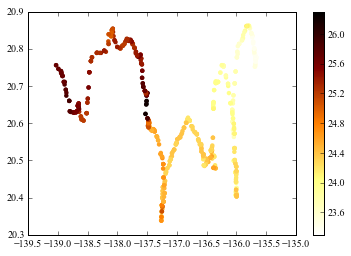

In [64]:
fig = plt.figure()
plt.scatter(lon_masked, lat_masked, s=20, c=temperature, edgecolor='None', cmap=plt.cm.afmhot_r)
plt.colorbar()
plt.show()

The **edgecolor='None'** option is necessary to properly visualise the data points in this case. We also avoid the [rainbow colormap](https://eagereyes.org/basics/rainbow-color-map), known to be misleading. There are may other choices: http://matplotlib.org/users/colormaps.html!

The resulting plot is obviously not perfect, so we will see in the next section how to improve its general aspect.